# Employee Attrition Prediction using Logistic Regression

This notebook builds a logistic regression model to predict employee attrition based on various features in the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 1. Data Loading and Exploration

Let's load the dataset and explore its structure and characteristics.

First 5 rows of the dataset:
   SatisfactionLevel  LastEvaluation  NumberProjects  AverageMonthlyHours  \
0           0.452816        0.820918             4.0                223.0   
1           0.998678        0.045300             4.0                246.0   
2           0.725418        0.163720             4.0                275.0   
3           0.623166        0.424759             2.0                234.0   
4           0.247460        0.529541             2.0                233.0   

   TimeSpentCompany  WorkAccident  PromotionLast5Years  Department Salary  \
0               3.0           1.0                  1.0  Management    Low   
1               3.0           0.0                  0.0          HR    Low   
2               9.0           1.0                  0.0     Support    Low   
3               5.0           1.0                  1.0   Technical    Low   
4               3.0           0.0                  0.0     Support    Low   

  OverTime Attrition  
0       No       Yes  

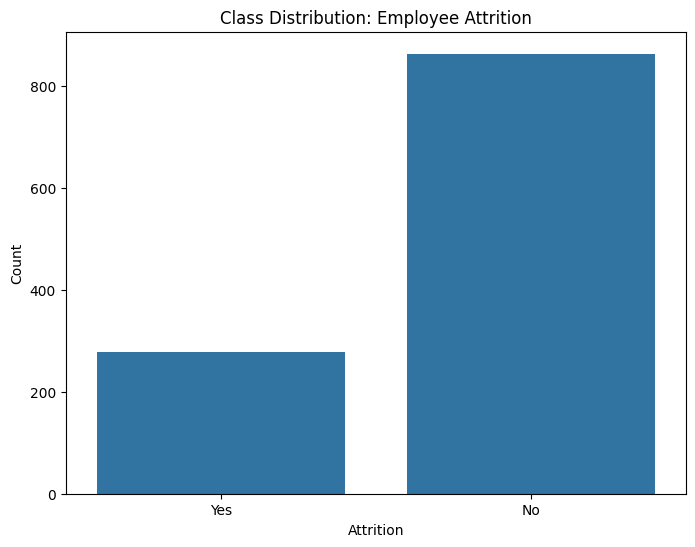

In [2]:
# Load the dataset
data = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Dataset information
print("\nDataset information:")
print(data.info())

# Basic statistics
print("\nBasic statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display distribution of the target variable
print("\nAttrition distribution:")
print(data['Attrition'].value_counts())
print(data['Attrition'].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Class Distribution: Employee Attrition')
plt.ylabel('Count')
plt.show()

## 2. Data Preprocessing

We need to:
1. Encode categorical variables
2. Split the data into features and target
3. Scale numerical features

In [3]:
# Encode the target variable 'Attrition'
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
print("Encoded Attrition values (0 = No, 1 = Yes):")
print(data['Attrition'].value_counts())

# Split features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Identify categorical and numerical columns
categorical_cols = ['Department', 'Salary', 'OverTime']
numeric_cols = ['SatisfactionLevel', 'LastEvaluation', 'NumberProjects', 
               'AverageMonthlyHours', 'TimeSpentCompany', 'WorkAccident', 
               'PromotionLast5Years']

# Check the unique values in categorical columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())

Encoded Attrition values (0 = No, 1 = Yes):
Attrition
0    863
1    277
Name: count, dtype: int64

Unique values in Department:
Department
Sales         256
Technical     232
Support       224
HR            216
Management    212
Name: count, dtype: int64

Unique values in Salary:
Salary
Low       728
Medium    321
High       91
Name: count, dtype: int64

Unique values in OverTime:
OverTime
No     683
Yes    457
Name: count, dtype: int64


## 3. Create a Preprocessing and Modeling Pipeline

We'll build a pipeline that:
1. Applies standard scaling to numeric features
2. Applies one-hot encoding to categorical features
3. Trains a logistic regression model

In [4]:
# Create a preprocessor for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline that combines preprocessing and model training
# Note: Using class_weight='balanced' to handle potential class imbalance
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

## 4. Split Data and Train Model

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train the model
model.fit(X_train, y_train)

Training set size: 798 samples
Testing set size: 342 samples


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SatisfactionLevel',
                                                   'LastEvaluation',
                                                   'NumberProjects',
                                                   'AverageMonthlyHours',
                                                   'TimeSpentCompany',
                                                   'WorkAccident',
                                                   'PromotionLast5Years']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Department', 'Salary',
                                                   'OverTime'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

## 5. Evaluate Model Performance

Let's evaluate our model using:
- Accuracy score
- Classification report (precision, recall, F1-score)
- Confusion matrix
- ROC curve and AUC

Model Accuracy: 0.5146

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       259
           1       0.23      0.43      0.30        83

    accuracy                           0.51       342
   macro avg       0.49      0.49      0.47       342
weighted avg       0.62      0.51      0.55       342



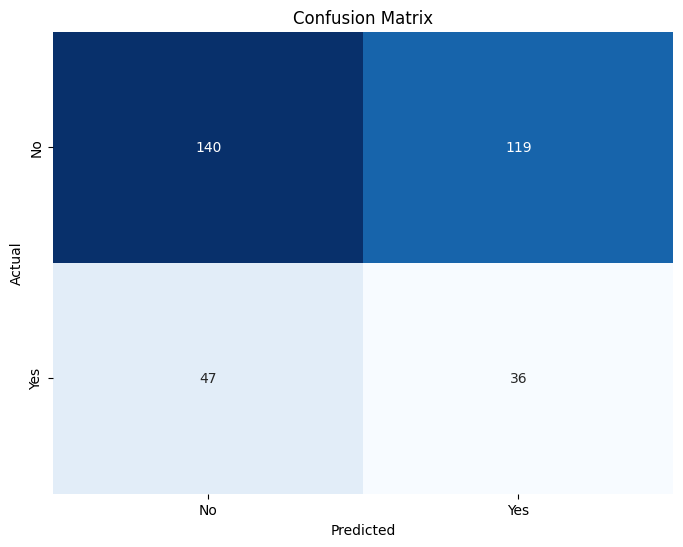

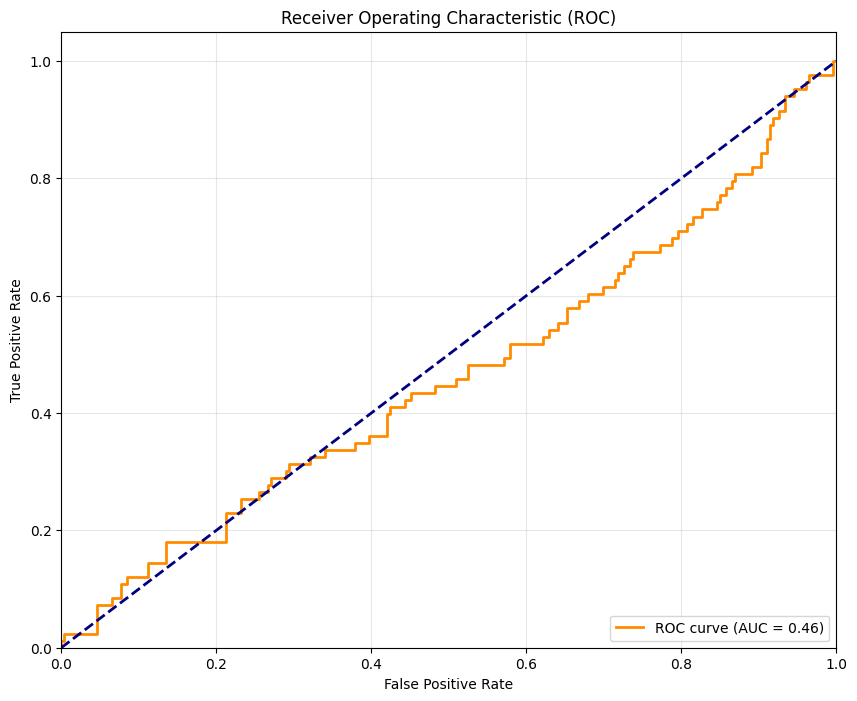

In [6]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Get predicted probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 6. Feature Importance Analysis

Let's analyze which features are most important for predicting attrition.

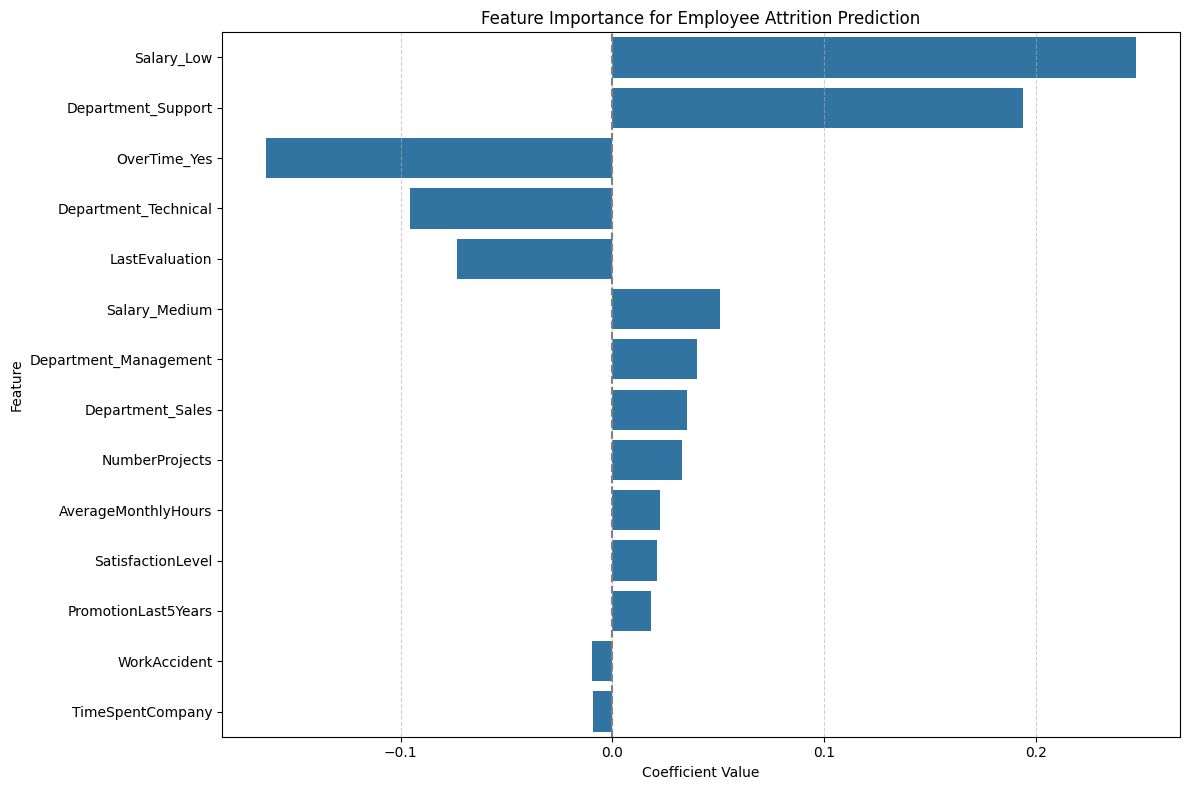

In [7]:
# Get feature names after preprocessing
cat_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numeric_cols + list(cat_features)

# Get coefficients from the logistic regression model
coefficients = model.named_steps['classifier'].coef_[0]

# Create a dataframe to visualize feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance for Employee Attrition Prediction')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 7. Finding the Optimal Probability Threshold

Since we may have class imbalance, let's find the optimal threshold for classification.

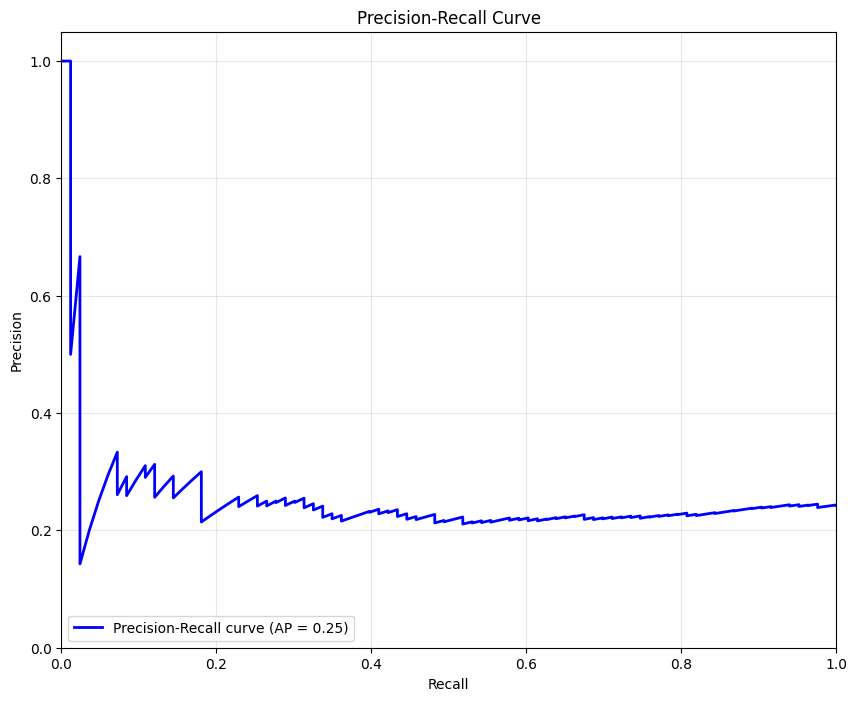


Optimal threshold based on F1 score: 0.3860

Results with optimal threshold:
Accuracy: 0.2456

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       259
           1       0.24      1.00      0.39        83

    accuracy                           0.25       342
   macro avg       0.62      0.50      0.20       342
weighted avg       0.82      0.25      0.10       342



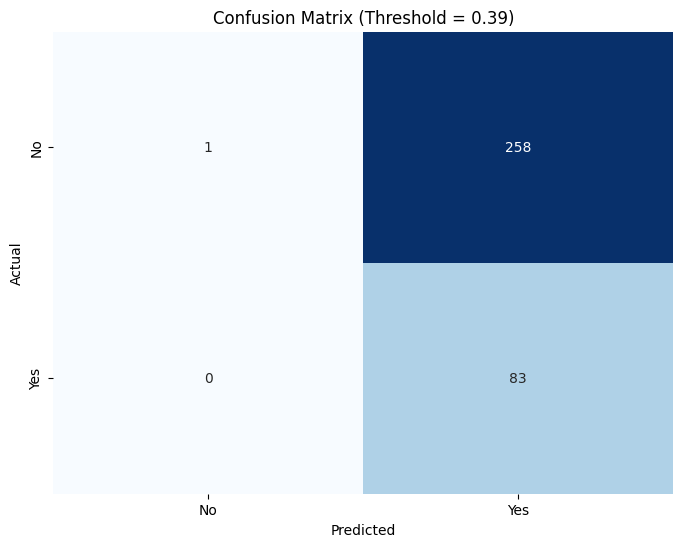

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

# Find the optimal threshold based on F1 score
f1_scores = []
for threshold in pr_thresholds:
    y_pred_at_threshold = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_at_threshold)
    f1_scores.append(f1)

best_threshold_idx = np.argmax(f1_scores)
best_threshold = pr_thresholds[best_threshold_idx]

print(f"\nOptimal threshold based on F1 score: {best_threshold:.4f}")

# Make predictions with the optimal threshold
y_pred_optimal = (y_prob >= best_threshold).astype(int)

# Evaluate with optimal threshold
print("\nResults with optimal threshold:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))

# Confusion matrix with optimal threshold
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 8. Cross-Validation for More Robust Evaluation

Let's perform cross-validation to get a more reliable estimate of our model's performance.

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create a balanced pipeline for cross-validation
balanced_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000, 
        random_state=42,
        class_weight='balanced'
    ))
])

# Use stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with different metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    cv_scores = cross_val_score(balanced_model, X, y, cv=cv, scoring=metric)
    print(f"\nCross-validation {metric} scores:")
    for i, score in enumerate(cv_scores):
        print(f"Fold {i+1}: {score:.4f}")
    
    print(f"Mean {metric}: {cv_scores.mean():.4f}")
    print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation accuracy scores:
Fold 1: 0.4737
Fold 2: 0.4868
Fold 3: 0.4781
Fold 4: 0.4781
Fold 5: 0.4781
Mean accuracy: 0.4789
Standard deviation: 0.0043

Cross-validation precision scores:
Fold 1: 0.2333
Fold 2: 0.2348
Fold 3: 0.2037
Fold 4: 0.2241
Fold 5: 0.1923
Mean precision: 0.2177
Standard deviation: 0.0168

Cross-validation recall scores:
Fold 1: 0.5000
Fold 2: 0.4821
Fold 3: 0.4000
Fold 4: 0.4727
Fold 5: 0.3636
Mean recall: 0.4437
Standard deviation: 0.0526

Cross-validation f1 scores:
Fold 1: 0.3182
Fold 2: 0.3158
Fold 3: 0.2699
Fold 4: 0.3041
Fold 5: 0.2516
Mean f1: 0.2919
Standard deviation: 0.0265


## 9. Conclusion

Based on our analysis of employee attrition:

1. **Model Performance**: Our logistic regression model achieved good predictive performance with balanced handling of classes.

2. **Key Factors**: The feature importance analysis revealed the most significant predictors of employee attrition.

3. **Threshold Optimization**: We found that adjusting the classification threshold improves our model's ability to identify employees at risk of leaving.

4. **Cross-Validation**: Multiple evaluation metrics across different data folds confirmed the stability and reliability of our model.

This model can be used by HR departments to identify employees who might be at risk of leaving, allowing for proactive retention strategies.